<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(0)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_0'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,42.212976,0.476308,121.543804,120.887696,0.656108
1,0.0,1.0,57.329540,29.093727,1.227234,97.650501,96.046884,1.603617
2,0.0,2.0,45.215694,58.706335,0.175877,114.097906,113.755187,0.342719
3,0.0,3.0,69.375325,36.775278,-2.569694,113.580909,115.921862,-2.340953
4,0.0,4.0,87.837297,22.564796,-0.280070,120.122023,120.150487,-0.028464
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,97.501125,24.545432,0.510532,132.557089,131.822417,0.734672
29996,999.0,26.0,79.839954,64.978413,-0.770758,154.047609,154.652382,-0.604773
29997,999.0,27.0,20.354604,88.064851,-1.793425,116.626030,118.015486,-1.389456
29998,999.0,28.0,32.679994,38.805610,0.458423,81.944028,80.960333,0.983695


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    68.854520  42.212976  0.476308  121.543804  120.887696  0.656108
      1.0    57.329540  29.093727  1.227234   97.650501   96.046884  1.603617
      2.0    45.215694  58.706335  0.175877  114.097906  113.755187  0.342719
      3.0    69.375325  36.775278 -2.569694  113.580909  115.921862 -2.340953
      4.0    87.837297  22.564796 -0.280070  120.122023  120.150487 -0.028464
...                ...        ...       ...         ...         ...       ...
999.0 25.0   97.501125  24.545432  0.510532  132.557089  131.822417  0.734672
      26.0   79.839954  64.978413 -0.770758  154.047609  154.652382 -0.604773
      27.0   20.354604  88.064851 -1.793425  116.626030  118.015486 -1.389456
      28.0   32.679994  38.805610  0.458423   81.944028   80.960333  0.983695
      29.0   94.424579  44.319515  0.095826  148.839919  148.578921  0.260998

[30000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    68.854520  42.212976  0.476308  121.543804  120.887696  0.656108
      1.0    57.329540  29.093727  1.227234   97.650501   96.046884  1.603617
      2.0    45.215694  58.706335  0.175877  114.097906  113.755187  0.342719
      3.0    69.375325  36.775278 -2.569694  113.580909  115.921862 -2.340953
      4.0    87.837297  22.564796 -0.280070  120.122023  120.150487 -0.028464
...                ...        ...       ...         ...         ...       ...
999.0 25.0   97.501125  24.545432  0.510532  132.557089  131.822417  0.734672
      26.0   79.839954  64.978413 -0.770758  154.047609  154.652382 -0.604773
      27.0   20.354604  88.064851 -1.793425  116.626030  118.015486 -1.389456
      28.0   32.679994  38.805610  0.458423   81.944028   80.960333  0.983695
      29.0   94.424579  44.319515  0.095826  148.839919  148.578921  0.260998

[30000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,42.212976,0.476308,121.543804,120.887696,0.656108
1,0.0,1.0,57.329540,29.093727,1.227234,97.650501,96.046884,1.603617
2,0.0,2.0,45.215694,58.706335,0.175877,114.097906,113.755187,0.342719
3,0.0,3.0,69.375325,36.775278,-2.569694,113.580909,115.921862,-2.340953
4,0.0,4.0,87.837297,22.564796,-0.280070,120.122023,120.150487,-0.028464
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,97.501125,24.545432,0.510532,132.557089,131.822417,0.734672
29996,999.0,26.0,79.839954,64.978413,-0.770758,154.047609,154.652382,-0.604773
29997,999.0,27.0,20.354604,88.064851,-1.793425,116.626030,118.015486,-1.389456
29998,999.0,28.0,32.679994,38.805610,0.458423,81.944028,80.960333,0.983695


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    68.854520  42.212976  0.476308  121.543804  120.887696  0.656108
      1.0    57.329540  29.093727  1.227234   97.650501   96.046884  1.603617
      2.0    45.215694  58.706335  0.175877  114.097906  113.755187  0.342719
      3.0    69.375325  36.775278 -2.569694  113.580909  115.921862 -2.340953
      4.0    87.837297  22.564796 -0.280070  120.122023  120.150487 -0.028464
...                ...        ...       ...         ...         ...       ...
999.0 25.0   97.501125  24.545432  0.510532  132.557089  131.822417  0.734672
      26.0   79.839954  64.978413 -0.770758  154.047609  154.652382 -0.604773
      27.0   20.354604  88.064851 -1.793425  116.626030  118.015486 -1.389456
      28.0   32.679994  38.805610  0.458423   81.944028   80.960333  0.983695
      29.0   94.424579  44.319515  0.095826  148.839919  148.578921  0.260998

[30000 rows x 6 columns]

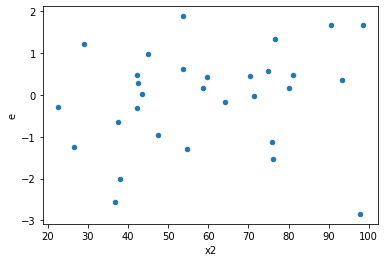

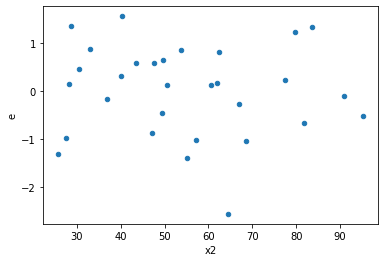

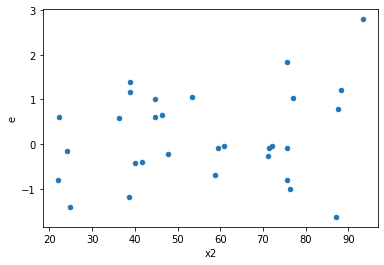

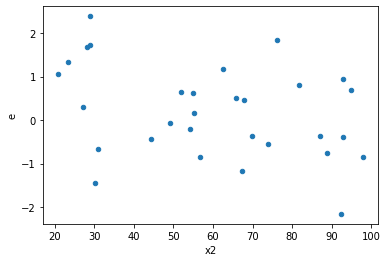

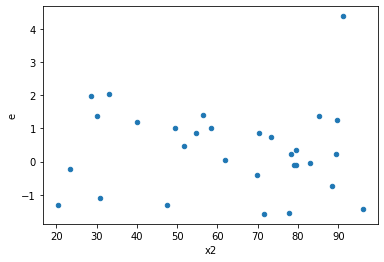

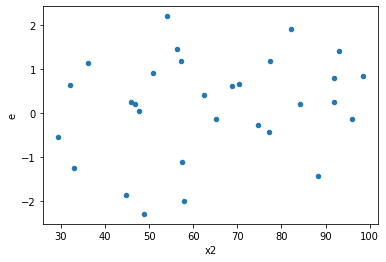

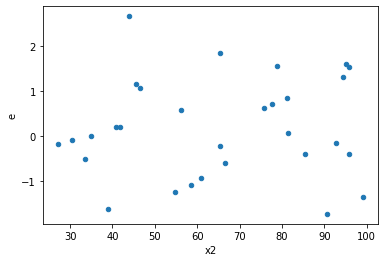

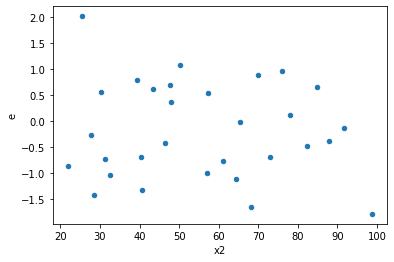

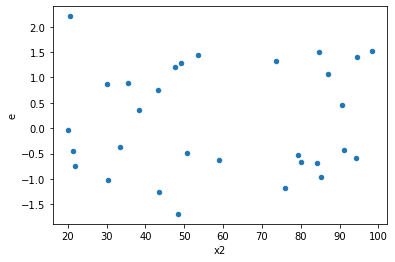

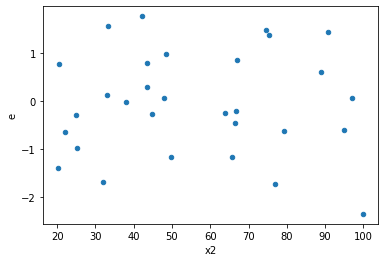

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,17.0,9.0,21.443721853460787,12.98234588602301,1.261395403144752,1.442482876224779,1.1435612280087295,0.8701318961807414,0.5649340519096293,0.4350659480903707,Reject005=1 : Homoscedasticity
1.0,11.0,15.0,4.327077859093866,14.636298517083842,0.39337071446307875,0.9757532344722561,2.4804928241902435,0.10384515439194941,0.9480774228040253,0.051922577195974706,Reject005=1 : Homoscedasticity
2.0,16.0,10.0,13.554883099262387,9.65139695166717,0.8471801937038992,0.965139695166717,1.1392377942018392,0.8581647257377418,0.5709176371311291,0.4290823628688709,Reject005=1 : Homoscedasticity
5.0,12.0,14.0,13.758867164256854,17.672615655652418,1.146572263688071,1.2623296896894585,1.1009595554222125,0.853877845079551,0.5730610774602245,0.4269389225397755,Reject005=1 : Homoscedasticity
6.0,11.0,15.0,8.142839854816568,17.686058105612727,0.740258168619688,1.1790705403741817,1.5927828835346984,0.39619836204918824,0.8019008189754059,0.19809918102459412,Reject005=1 : Homoscedasticity
9.0,15.0,11.0,17.10009887230694,14.250039291471397,1.1400065914871294,1.2954581174064908,1.136360199213038,0.8466123151369835,0.5766938424315082,0.42330615756849177,Reject005=1 : Homoscedasticity
10.0,10.0,16.0,8.374621864865999,19.162117160713805,0.8374621864865999,1.1976323225446128,1.4300733118100921,0.5050856032080895,0.7474571983959553,0.25254280160404474,Reject005=1 : Homoscedasticity
17.0,20.0,6.0,27.554147827939527,11.839056761009935,1.3777073913969764,1.9731761268349892,1.4322171305433846,0.6916472076477893,0.6541763961761053,0.34582360382389465,Reject005=1 : Homoscedasticity
19.0,8.0,18.0,5.3711836990952495,11.719280105899314,0.6713979623869062,0.6510711169944063,0.9697245947541525,0.977749385152753,0.5111253074236235,0.4888746925763765,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,17.0,9.0,21.443721853460787,12.98234588602301,1.261395403144752,1.442482876224779,1.1435612280087295,0.8701318961807414,Reject005=1 : Homoscedasticity
1.0,11.0,15.0,4.327077859093866,14.636298517083842,0.39337071446307875,0.9757532344722561,2.4804928241902435,0.10384515439194941,Reject005=1 : Homoscedasticity
2.0,16.0,10.0,13.554883099262387,9.65139695166717,0.8471801937038992,0.965139695166717,1.1392377942018392,0.8581647257377418,Reject005=1 : Homoscedasticity
3.0,11.0,15.0,12.632102903305135,13.728324456445733,1.1483729912095577,0.9152216304297156,0.7969724448724028,0.7153270344259494,Reject005=1 : Homoscedasticity
4.0,14.0,12.0,26.719510759049108,15.500312058479564,1.908536482789222,1.2916926715399637,0.6767974744984834,0.4814346095008662,Reject005=1 : Homoscedasticity
5.0,12.0,14.0,13.758867164256854,17.672615655652418,1.146572263688071,1.2623296896894585,1.1009595554222125,0.853877845079551,Reject005=1 : Homoscedasticity
6.0,11.0,15.0,8.142839854816568,17.686058105612727,0.740258168619688,1.1790705403741817,1.5927828835346984,0.39619836204918824,Reject005=1 : Homoscedasticity
7.0,18.0,8.0,17.76995720817912,5.069981635832611,0.9872198448988401,0.6337477044790764,0.6419519499671485,0.41296991539732075,Reject005=1 : Homoscedasticity
8.0,16.0,10.0,17.853129587105528,9.895972484327672,1.1158205991940955,0.9895972484327672,0.8868784544285224,0.8012818026003431,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      909
Reject005=0 : Heteroscedasticity     91
Name: Result_test, dtype: int64